In [1]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.5/263.5 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.5 MB/s eta 0:00:00


In [2]:
!wandb login 34c9a1875aa312280a5650afd5c45ab5d731d908

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


4422102/4422102 [==============================] - 0s 0us/step


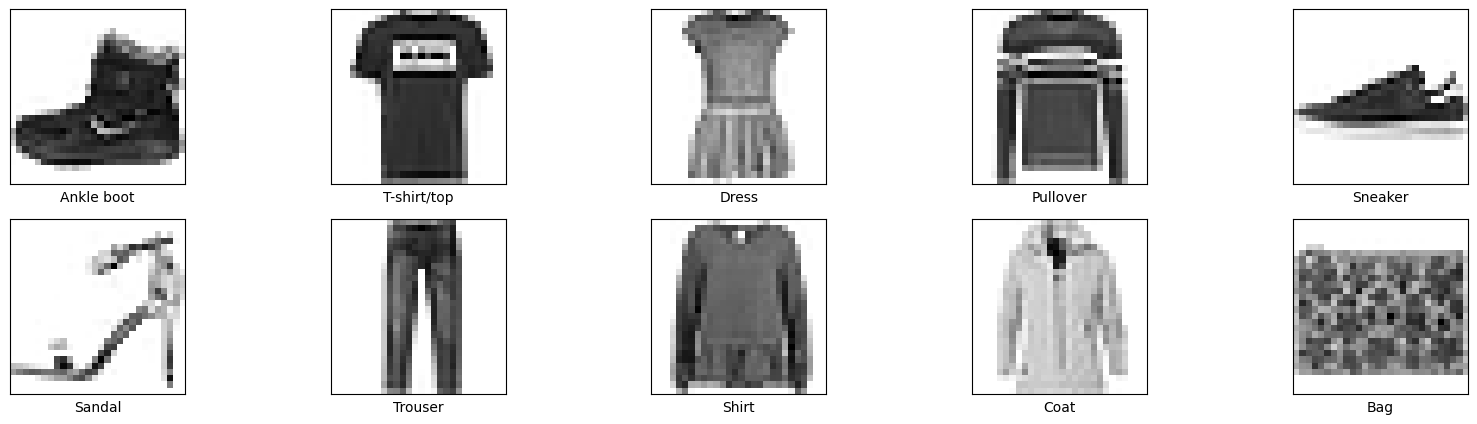

In [3]:
import os  # Importing os module for operating system dependent functionality
from keras.datasets import fashion_mnist  # Importing fashion_mnist dataset from keras
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
import wandb  # Importing Weights & Biases library for experiment tracking


# Loading Fashion MNIST dataset into training and testing sets
(trainX,trainy),(testX,testy) = fashion_mnist.load_data()

# Loading Fashion MNIST dataset into training and testing sets
wandb.init(project='',entity='cs23m008',name='question 1')


# List of classes in Fashion MNIST dataset
class_list = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

i=0
data_images=[]
data_images_class=[]

while(len(data_images_class) < 10):
  if(class_list[trainy[i]] not in data_images_class):
    data_images.append(trainX[i])
    data_images_class.append(class_list[trainy[i]])
  i+=1

fig1 = plt.figure(figsize=(20,5))

# Plotting sample images along with their corresponding classes
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(data_images[i],cmap=plt.cm.binary)
    plt.xlabel(data_images_class[i])
    plt.grid(False)
plt.show()
wandb.log({"Sample Image for each class": fig1})
wandb.save()
wandb.finish()

# ACTIVATION FUNCTION

In [4]:
# calculate different activation functions
def sigmoid(x):
  return 1.0/(1.0 + np.exp(-x))

def tanh(x):
  return np.tanh(x)

def relu(x):
  return np.maximum(0,x)

"""
  Function to compute the softmax activation function.

    Parameters:
    - x: Input data.

    Returns:
    - output: Softmax output.
"""
def softmax(x):
  output = []
  n = len(x)
  for i in range(n):
    total = 0
    x[i] -= x[i][np.argmax(x[i])]
    m = len(x[i])
    for j in range(m):
      total+=(np.exp(x[i][j]))
    output.append(np.exp(x[i])/total)
  return np.array(output)

"""
    Function to calculate cross-entropy loss.

    Parameters:
    - y_hat: Predicted labels.
    - y: True labels.

    Returns:
    - error: Cross-entropy error.
"""
def cross_entropy(y_hat,y):
  epsilon_ce = 1e-9
  error = -(np.multiply(y,np.log(y_hat+epsilon_ce))).sum()/len(y_hat)
  return error

"""
    Function to compute different activation functions.

    Parameters:
    - x: Input data.
    - fn_label: Label for the activation function.

    Returns:
    - Activation output.
"""
def activation_functions(x,fn_label="sigmoid") :
  if fn_label == 'ReLU':
    return relu(x)
  elif fn_label == 'sigmoid' :
    return sigmoid(x)
  elif fn_label == 'tanh':
    return tanh(x)
  elif fn_label == 'softmax':
    return softmax(x)
  else:
    return 'error'

"""
    Function to calculate mean squared error loss.

    Parameters:
    - y_cap: Predicted labels.
    - y: True labels.

    Returns:
    - error: Mean squared error.
"""
def mean_squared_error(y_cap,y):
  return np.sum(((y-y_cap)*(y-y_cap))/(len(y)+len(y)))

"""
    Function to compute derivatives of different activation functions.

    Parameters:
    - x: Input data.
    - fn_label: Label for the activation function.

    Returns:
    - Derivative of the activation function.
"""
def activation_derivative(x, fn_label="sigmoid"):
    if fn_label == "ReLU":
      return 1.0 * (x>0)
    elif fn_label == "tanh":
      return 1.0-(tanh(x)**2)
    elif fn_label == "sigmoid":
      return (1.0-sigmoid(x))*sigmoid(x)
    else:
      return 'error'


# Question-2 Forward Propogation

In [5]:
import os
import numpy as np
from keras.datasets import fashion_mnist
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
import wandb
# ep = 10
# bs = 30
# lf = 'cross_entropy'
# op = 'nadam'
# lr = 1e-3
data_set = 'fashion_mnist'

m_beta = 0.9
rmsprop_beta = 0.9
beta_1 = 0.9
beta_2 = 0.999
epsilon_ = 1e-3
wdc = 0
# winit = 'Xavier'
# nhls = 3
# hls = 128
# af = 'ReLU'
# constants
INPUT_KEY = 'input_size'
OUTPUT_KEY = 'output_size'
FUN_KEY = "function"

def map_data_with_classes(classes):
  rows = len(classes)
  maxNum = 0
  for i in range(rows):
    if(maxNum<classes[i]) :
      maxNum = classes[i]

  cols = maxNum + 1
  matrix = np.zeros((rows,cols))

  for j in range(rows):
    matrix[j][classes[j]] = 1
  return matrix


if data_set == 'fashion_mnist':
  (train_X,train_Y),(test_X,test_Y) = fashion_mnist.load_data()
elif data_set == 'mnist':
  (train_X,train_Y),(test_X,test_Y) = mnist.load_data()

train_X = train_X/255
test_X = test_X/255

needed_y_train = train_Y
needed_y_test = test_Y

# splitting data into train and validation sets
trainX, val_X, trainy, valy = train_test_split(train_X, train_Y, test_size=0.1, random_state=40)

#flatten 2d image vectors to 1d vectors and treat them as training data
trainX = trainX.reshape(len(trainX),len(trainX[0])*len(trainX[1]))
testX = test_X.reshape(len(test_X),len(test_X[0])*len(test_X[1]))
valX = val_X.reshape(len(val_X),len(val_X[0])*len(val_X[1]))

trainX = trainX[:(len(trainX)//128)*128,:]
testX = testX[:(len(testX)//128)*128,:]
valX = valX[:(len(valX)//128)*128,:]

trainy = trainy[:(len(trainy)//128)*128]
test_Y = test_Y[:(len(test_Y)//128)*128]
valy = valy[:(len(valy)//128)*128]

# print(trainX.shape)
# print(testX.shape)
# print(valX.shape)
# print("y")
# print(trainy.shape)
# print(test_Y.shape)
# print(valy.shape)

# (54000, 784)
# (10000, 784)
# (6000, 784)

trainy = map_data_with_classes(trainy)
testy = map_data_with_classes(test_Y)
valiy = map_data_with_classes(valy)

input_layer_size = len(trainX[0])
output_layer_size = len(trainy[0])

# function to initialize the weights and biases
def initialize_weights_and_biases(layers,number_hidden_layers = 1,init_type='random'):

  """
    Function to initialize weights and biases for neural network layers.

    Parameters:
    - layers: List of dictionaries containing layer information (input and output sizes).
    - number_hidden_layers: Number of hidden layers in the neural network (default is 1).
    - init_type: Type of initialization for weights and biases ('random' or 'Xavier').

    Returns:
    - weights: List of weight matrices for each layer.
    - biases: List of bias vectors for each layer.
  """
  
  weights ,biases = [],[]
  OUTPUT_KEY = "output_size"
  INPUT_KEY = "input_size"
  if(init_type == 'random'):
    for i in range(number_hidden_layers+1):
      weights.append(np.random.normal(0,0.5,(layers[i][OUTPUT_KEY],layers[i][INPUT_KEY])))
      biases.append(np.random.normal(0,0.5,(layers[i][OUTPUT_KEY],1)))
  else:
    # Xaviar
    for i in range(number_hidden_layers+1):
      right_x = np.sqrt(6/(layers[i][OUTPUT_KEY] + layers[i][INPUT_KEY]))
      left_x = -1 * right_x
      weights.append(np.random.uniform(left_x, right_x, size=(layers[i][OUTPUT_KEY], layers[i][INPUT_KEY])))
      biases.append(np.random.uniform(left_x, right_x, size=(layers[i][OUTPUT_KEY], 1)))
  return weights,biases

"""
    Function to calculate training accuracy.

    Parameters:
    - batch_testy: True labels of the batch data.
    - y_predicted: Predicted labels of the batch data.
    - trainy: True labels of the entire training set.

    Returns:
    - accuracy: Training accuracy.
"""

def train_accuracy(batch_testy,y_predicted,trainy):
  c = 0
  for j in range(len(batch_testy)):
    for k in range(len(batch_testy[j])):
      for l in range(len(batch_testy[j][k])):
        if batch_testy[j][k][l] == 1 :
          index_of_one = l
          break
      maxi = 0
      for l in range(len(y_predicted[j][k])):
        if y_predicted[j][k][l] > maxi :
          maxi,pred_class = y_predicted[j][k][l],l
      if(pred_class == index_of_one):
        c+=1
  return (c/len(trainy))

"""
    Function to calculate test accuracy.

    Parameters:
    - testX: Input test data.
    - testy: True labels of the test data.
    - weights: List of weight matrices for each layer.
    - biases: List of bias vectors for each layer.
    - number_hidden_layers: Number of hidden layers in the neural network.
    - activation_function: Activation function used in hidden layers.
    - output_function: Output function used in the output layer.

    Returns:
    - accuracy: Test accuracy.
"""
def test_accuracy(testX,testy,weights,biases,number_hidden_layers,activation_function,output_function):
  a,h = forward_propagation(testX,weights,biases,number_hidden_layers, activation_function, output_function)
  n_test = len(testy)
  y_pred,y_predicted = h[-1],[]
  n_pred = len(y_pred)
  for i in range(n_pred):
    y_predicted.append(np.argmax(y_pred[i]))
  c = 0
  for i in range(n_test):
    if y_predicted[i] == testy[i]:
      c+=1
  return c/n_test

"""
    Function to calculate the regularization term.

    Parameters:
    - y: True labels of the data.
    - weight_decay_const: Constant for weight decay.
    - number_hidden_layers: Number of hidden layers in the neural network.
    - weights: List of weight matrices for each layer.

    Returns:
    - reg_term: Regularization term.
"""
def calculate_regularizing_term(y,weight_decay_const,number_hidden_layers,weights):
  reg_term = 0.0
  for i in range(number_hidden_layers+1):
    reg_term += (np.sum(weights[i]*weights[i]))
  n_y = len(y)
  temp = weight_decay_const/(2*n_y)
  reg_term = ((temp)*(reg_term))
  return reg_term

"""
    Function to calculate validation loss.

    Parameters:
    - valX: Input validation data.
    - valy: True labels of the validation data.
    - weights: List of weight matrices for each layer.
    - biases: List of bias vectors for each layer.
    - number_hidden_layers: Number of hidden layers in the neural network.
    - activation_function: Activation function used in hidden layers.
    - output_function: Output function used in the output layer.
    - loss_function: Loss function used to calculate the error.

    Returns:
    - error: Validation loss.
"""
def val_loss(valX,valy,weights,biases,number_hidden_layers, activation_function,output_function,loss_function):
  a,h = forward_propagation(valX,weights,biases,number_hidden_layers, activation_function, output_function)
  y_hat = h[-1]
  if loss_function == 'cross_entropy':
    error = cross_entropy(y_hat,valy)
  elif loss_function == 'mean_squared_error':
    error = mean_squared_error(y_hat,valy)
  return error


 """
    Function to perform forward propagation in a neural network.

    Parameters:
    - input_x: Input data.
    - W: List of weight matrices for each layer.
    - B: List of bias vectors for each layer.
    - hidden_layers: Number of hidden layers in the neural network.
    - activ_label: Label for activation function.
    - op_label: Label for output function.

    Returns:
    - a: List of activation matrices for each layer.
    - h: List of hidden state matrices for each layer.
 """
def forward_propagation(input_x, W, B, hidden_layers, activ_label, op_label):
  # Initialize lists to store activations (a) and hidden states (h)
  a, h = [], []

  # Reshape input_x if necessary
  n, m = len(input_x), len(input_x[0])
  batch_trainX = np.reshape(input_x, (n, m))

  # Compute activations and hidden states for the first hidden layer
  a.append(np.dot(W[0], batch_trainX.T) + B[0])
  h.append(activation_functions(np.dot(W[0],batch_trainX.T) + B[0],activ_label))

  # Compute activations and hidden states for subsequent hidden layers
  for i in range(1, hidden_layers):
    an = np.dot(W[i], h[i-1]) + B[i]
    a.append(an)
    hn = activation_functions(an, activ_label)
    h.append(hn)

  # Compute activations and hidden states for the output layer
  aL = np.matmul(W[hidden_layers], h[hidden_layers-1]) + B[hidden_layers]
  hL = activation_functions(aL.T, op_label)
  hL = hL.T
  a.append(aL)
  h.append(hL)

  # Transpose activation and hidden state lists for consistency
  for i in range(0, hidden_layers+1):
    a[i], h[i] = a[i].T, h[i].T

  return a, h

def backward_propagation(batch_trainy , batch_trainX ,y_hat , a, h, weights, number_hidden_layers ,derivative_function = 'sigmoid'):
  del_a,del_W,del_b,del_h = {},{},{},{}

  batch_trainy = batch_trainy.reshape(len(batch_trainy),len(batch_trainy[0]))

  ep =1e-8
  keyA = 'a'+ str(number_hidden_layers+1)
  keyH ='h'+ str(number_hidden_layers+1)
  del_a[keyA] = -(batch_trainy-y_hat)
  del_h[keyH] = -(batch_trainy/(y_hat+ep))
  xval = len(batch_trainX)
  # starting from last layer and going to first layer
  for i in range(number_hidden_layers + 1,1,-1):
    # calculating del of weights from del of a and h from foward propagation
    keyW = 'W' + str(i)
    keyB = 'b' + str(i)
    keyA = 'a'+ str(i)
    prevKeyA = 'a'+str(i-1)
    prevKeyH = 'h'+str(i-1)
    del_W[keyW] = np.dot(del_a[keyA].T,h[i-2])

    # applying L2 regularization
    del_W[keyW] += (wdc * weights[i-1])
    del_W[keyW]/=xval

    # calculating del of biases from del of a
    del_b[keyB] = del_a[keyA]

    # calculating del of h from weights and del of a
    del_h[prevKeyH] = np.dot(weights[i-1].T , del_a[keyA].T)

    # calculating del of a from del of h
    del_a[prevKeyA] = np.multiply(del_h[prevKeyH],activation_derivative(a[i-2].T,derivative_function))
    del_a[prevKeyA] = del_a[prevKeyA].T


  # for first we only need to calculate del W and del b and not del h and del a
  del_W['W'+str('1')],del_b['b'+str('1')] = np.dot(del_a['a1'].T,batch_trainX),del_a['a1']

  for j in range(1,len(del_b)+1):
    li = []
    k = 0
    while k<len(del_b['b'+str(j)][0]):
      sum = 0
      l = 0
      while l<len(del_b['b'+str(j)]):
        sum += del_b['b'+str(j)][l][k]
        l+=1
      li.append(sum/xval)
      k+=1
    li = np.array(li)
    del_b['b'+str(j)] = li.reshape(len(li),1)

  return del_W,del_b

def gradient_descent(trainX, trainy, number_hidden_layers = 1, hidden_layer_size = 4, eta = 0.1, initial_weights = 'random', activation_function = 'sigmoid', epochs = 1, output_function = 'softmax', mini_batch_size=4,loss_function = 'cross_entropy',weight_decay_const=0,wandb_flag=False):
  layers = []
  layers.append({INPUT_KEY : input_layer_size, OUTPUT_KEY : hidden_layer_size, FUN_KEY : activation_function})
  for i in range(number_hidden_layers-1):
    layers.append({INPUT_KEY : hidden_layer_size, OUTPUT_KEY : hidden_layer_size, FUN_KEY : activation_function})
  layers.append({INPUT_KEY : hidden_layer_size, OUTPUT_KEY : output_layer_size, FUN_KEY : output_function})

#initialize weights and biases
  weights,biases = initialize_weights_and_biases(layers,number_hidden_layers,initial_weights)
  x_val = len(trainX)
  number_batches = x_val/mini_batch_size

  mini_batch_trainX,mini_batch_trainy = np.array(np.array_split(trainX, number_batches)),np.array(np.array_split(trainy, number_batches))

  train_loss_list,  val_loss_list,  train_acc_list,  val_acc_list = [],[],[],[]
  h=None
  for j in range(epochs):
    tloss,vloss = 0,0
    y_predicted = []
    for k in range(len(mini_batch_trainX)):
      a,h = forward_propagation(mini_batch_trainX[k],weights,biases,number_hidden_layers, activation_function, output_function)
      y_predicted.append(h[-1])

      if loss_function == 'cross_entropy':
        tloss += cross_entropy(h[-1],mini_batch_trainy[k])
      elif loss_function == 'mean_squared_error':
        tloss += mean_squared_error( h[-1],mini_batch_trainy[k])
      else:
        print('wrong loss function')

      del_W,del_b = backward_propagation(mini_batch_trainy[k],mini_batch_trainX[k],h[-1],a,h,weights,number_hidden_layers ,activation_function)

      for i in range(len(weights)):
        keyW = 'W'+str(i+1)
        keyB = 'b'+str(i+1)
        weights[i] -=  (del_W[keyW]*eta)
        biases[i] -= (del_b[keyB]*eta)
    reg_term_train = calculate_regularizing_term(trainy,weight_decay_const,number_hidden_layers,weights)
    tr_loss = tloss/number_batches + reg_term_train
    vloss = val_loss(valX,valiy,weights,biases,number_hidden_layers,activation_function,output_function,loss_function)
    reg_term_val = calculate_regularizing_term(valiy,weight_decay_const,number_hidden_layers,weights)
    vloss = vloss + reg_term_val
    print("epoch : ",j+1," validation loss : ",vloss)

    train_loss_list.append(tr_loss)
    val_loss_list.append(vloss)
    train_acc = train_accuracy(mini_batch_trainy,y_predicted,trainy)
    train_acc_list.append(train_acc)
    val_acc = test_accuracy(valX,valy,weights,biases,number_hidden_layers,activation_function,output_function)
    val_acc_list.append(val_acc)

    if wandb_flag == True:
      wandb.log({"loss":tr_loss,"val_loss":vloss,"accuracy":train_acc,"val_accuracy":val_acc,"epoch":j})

  plot_lists = [train_loss_list,val_loss_list,train_acc_list,val_acc_list]
  return h[-1],weights,biases,plot_lists



def momentum_based_gradient_descent(trainX, trainy, number_hidden_layers = 1, hidden_layer_size = 4, eta = 0.1, initial_weights = 'random', activation_function = 'sigmoid', epochs = 1, output_function = 'softmax', mini_batch_size=4,loss_function = 'cross_entropy',weight_decay_const=0,wandb_flag=False):



  #initialize layers of neural networks
  layers = []
  inputLayer = {INPUT_KEY : input_layer_size, OUTPUT_KEY : hidden_layer_size, FUN_KEY : activation_function}
  layers.append(inputLayer)

  for i in range(number_hidden_layers-1):
    hiddenLayer = {INPUT_KEY : hidden_layer_size, OUTPUT_KEY : hidden_layer_size, FUN_KEY : activation_function}
    layers.append(hiddenLayer)

  outputLayer = {INPUT_KEY : hidden_layer_size, OUTPUT_KEY : output_layer_size, FUN_KEY : output_function}
  layers.append(outputLayer)

  #initialize weights and biases

  number_batches = len(trainX)/mini_batch_size

  weights,biases = initialize_weights_and_biases(layers,number_hidden_layers,initial_weights)
  mini_batch_trainX,mini_batch_trainy = np.array(np.array_split(trainX, number_batches)),np.array(np.array_split(trainy, number_batches))

  past_weights,past_biases = [],[]

  for i in range(number_hidden_layers+1):
    mW,mB,nW,nB = len(weights[i]),len(biases[i]),len(weights[i][0]),len(biases[i][0])
    past_weights.append(np.zeros((mW,nW)))
    past_biases.append(np.zeros((mB,nB)))

  train_loss_list,  val_loss_list,  train_acc_list,  val_acc_list = [],[],[],[]
  h=None
  for j in range(epochs):
    tloss = 0
    vloss = 0
    y_predicted = []
    for k in range(len(mini_batch_trainX)):
      a,h = forward_propagation(mini_batch_trainX[k],weights,biases,number_hidden_layers, activation_function, output_function)
      y_predicted.append(h[-1])

      if loss_function == 'cross_entropy':
        tloss += cross_entropy(h[-1],mini_batch_trainy[k])
      elif loss_function == 'mean_squared_error':
        tloss += mean_squared_error(h[-1],mini_batch_trainy[k])
      else:
        print('wrong loss function')

      del_W,del_b = backward_propagation(mini_batch_trainy[k],mini_batch_trainX[k],h[-1],a,h,weights,number_hidden_layers ,activation_function)

      for i in range(number_hidden_layers+1):
        keyW = 'W' + str(i+1)
        keyB = 'b' + str(i+1)
        past_weights[i],past_biases[i] = (past_weights[i]*m_beta) + (del_W[keyW] * eta),(past_biases[i]*m_beta) + (del_b[keyB] * eta)

        weights[i],biases[i] = weights[i]-past_weights[i],biases[i]-past_biases[i]

    train_acc = train_accuracy(mini_batch_trainy,y_predicted,trainy)
    reg_term_train = calculate_regularizing_term(trainy,weight_decay_const,number_hidden_layers,weights)
    tr_loss = tloss/number_batches + reg_term_train
    val_acc = test_accuracy(valX,valy,weights,biases,number_hidden_layers,activation_function,output_function)
    vloss = val_loss(valX,valiy,weights,biases,number_hidden_layers,activation_function,output_function,loss_function)
    reg_term_val = calculate_regularizing_term(valiy,weight_decay_const,number_hidden_layers,weights)
    vloss = vloss + reg_term_val
    print("epoch : ",j+1," validation loss : ",vloss)

    train_loss_list.append(tr_loss)
    val_loss_list.append(vloss)
    train_acc = train_accuracy(mini_batch_trainy,y_predicted,trainy)
    train_acc_list.append(train_acc)
    val_acc = test_accuracy(valX,valy,weights,biases,number_hidden_layers,activation_function,output_function)
    val_acc_list.append(val_acc)

    if wandb_flag == True:
      wandb.log({"loss":tr_loss,"val_loss":vloss,"accuracy":train_acc,"val_accuracy":val_acc,"epoch":j})

  plot_lists = [train_loss_list,val_loss_list,train_acc_list,val_acc_list]
  return h[-1],weights,biases,plot_lists

def nestrov_accelerated_gradient_descent(trainX, trainy, number_hidden_layers = 1, hidden_layer_size = 4, eta = 0.1, initial_weights = 'random', activation_function = 'sigmoid', epochs = 1, output_function = 'softmax', mini_batch_size=4,loss_function = 'cross_entropy',weight_decay_const=0,wandb_flag=False):

  layers = []
  layers.append({INPUT_KEY : input_layer_size, OUTPUT_KEY : hidden_layer_size, FUN_KEY : activation_function})

  for i in range(number_hidden_layers-1):
    layers.append({INPUT_KEY : hidden_layer_size, OUTPUT_KEY : hidden_layer_size, FUN_KEY : activation_function})

  layers.append({INPUT_KEY : hidden_layer_size, OUTPUT_KEY : output_layer_size, FUN_KEY : output_function})

  #initialize weights and biases

  weights,biases = initialize_weights_and_biases(layers,number_hidden_layers,initial_weights)
  x_val = len(trainX)
  number_batches = x_val/mini_batch_size

  mini_batch_trainX,mini_batch_trainy = np.array(np.array_split(trainX, number_batches)),np.array(np.array_split(trainy, number_batches))

  past_weights,past_biases = [],[]

  # beta = 0.9

  for i in range(number_hidden_layers+1):
    past_weights.append(np.zeros((len(weights[i]),len(weights[i][0]))))
    past_biases.append(np.zeros((len(biases[i]),len(biases[i][0]))))

  train_loss_list,  val_loss_list,  train_acc_list,  val_acc_list, = [],[],[],[]
  h=None
  for j in range(epochs):
    tloss,vloss = 0,0
    y_predicted = []
    for k in range(len(mini_batch_trainX)):
      lookahead_weights,lookahead_biases = [],[]
      for l in range(number_hidden_layers+1):
        lookahead_weights.append(weights[l] - (past_weights[l] * m_beta))
        lookahead_biases.append(biases[l] - (past_biases[l] * m_beta))
      a,h = forward_propagation(mini_batch_trainX[k],lookahead_weights,lookahead_biases,number_hidden_layers, activation_function, output_function)
      y_predicted.append(h[-1])

      if loss_function == 'cross_entropy':
        tloss += cross_entropy(h[-1],mini_batch_trainy[k])
      elif loss_function == 'mean_squared_error':
        tloss += mean_squared_error(h[-1],mini_batch_trainy[k])
      else:
        print('wrong loss function')

      del_W,del_b = backward_propagation(mini_batch_trainy[k],mini_batch_trainX[k],h[-1],a,h,lookahead_weights,number_hidden_layers ,activation_function)

      for i in range(number_hidden_layers+1):
        keyW = 'W' + str(i+1)
        keyB = 'b' + str(i+1)
        past_weights[i] = (past_weights[i]*m_beta) + (del_W[keyW] * eta)
        past_biases[i] = (past_biases[i]*m_beta) + (del_b[keyB] * eta)

        weights[i],biases[i] = weights[i]-past_weights[i], biases[i]-past_biases[i]

    reg_term_train = calculate_regularizing_term(trainy,weight_decay_const,number_hidden_layers,weights)
    tr_loss = tloss/number_batches + reg_term_train
    vloss = val_loss(valX,valiy,weights,biases,number_hidden_layers,activation_function,output_function,loss_function)
    reg_term_val = calculate_regularizing_term(valiy,weight_decay_const,number_hidden_layers,weights)
    vloss = vloss + reg_term_val
    print("epoch : ",j+1," validation loss : ",vloss)

    train_loss_list.append(tr_loss)
    val_loss_list.append(vloss)
    train_acc = train_accuracy(mini_batch_trainy,y_predicted,trainy)
    train_acc_list.append(train_acc)
    val_acc = test_accuracy(valX,valy,weights,biases,number_hidden_layers,activation_function,output_function)
    val_acc_list.append(val_acc)

    if wandb_flag == True:
      wandb.log({"loss":tr_loss,"val_loss":vloss,"accuracy":train_acc,"val_accuracy":val_acc,"epoch":j})

  plot_lists = [train_loss_list,val_loss_list,train_acc_list,val_acc_list]
  return h[-1],weights,biases,plot_lists

def rmsprop(trainX, trainy, number_hidden_layers = 1, hidden_layer_size = 4, eta = 0.1, initial_weights = 'random', activation_function = 'sigmoid', epochs = 1, output_function = 'softmax', mini_batch_size=4,loss_function = 'cross_entropy',weight_decay_const=0,wandb_flag=False):

  layers = []
  layers.append({INPUT_KEY : input_layer_size, OUTPUT_KEY : hidden_layer_size, FUN_KEY : activation_function})

  for i in range(number_hidden_layers-1):
    layers.append({INPUT_KEY : hidden_layer_size, OUTPUT_KEY : hidden_layer_size, FUN_KEY : activation_function})

  layers.append({INPUT_KEY : hidden_layer_size, OUTPUT_KEY : output_layer_size, FUN_KEY : output_function})

  #initialize weights and biases

  weights,biases = initialize_weights_and_biases(layers,number_hidden_layers,initial_weights)
  x_val = len(trainX)
  number_batches = x_val/mini_batch_size

  mini_batch_trainX,mini_batch_trainy = np.array(np.array_split(trainX, number_batches)),np.array(np.array_split(trainy, number_batches))

  v_weights,v_biases = [],[]

  # beta = 0.9
  # ep = 1e-3

  for i in range(number_hidden_layers+1):
    v_weights.append(np.zeros((len(weights[i]),len(weights[i][0]))))
    v_biases.append(np.zeros((len(biases[i]),len(biases[i][0]))))

  train_loss_list,  val_loss_list,  train_acc_list,  val_acc_list, = [],[],[],[]
  h=None
  for j in range(epochs):
    tloss,vloss = 0,0
    y_predicted = []
    for k in range(len(mini_batch_trainX)):
      a,h = forward_propagation(mini_batch_trainX[k],weights,biases,number_hidden_layers, activation_function, output_function)
      y_predicted.append(h[-1])

      if loss_function == 'cross_entropy':
        tloss += cross_entropy(h[-1],mini_batch_trainy[k])
      elif loss_function == 'mean_squared_error':
        tloss += mean_squared_error(h[-1],mini_batch_trainy[k])
      else:
        print('wrong loss function')

      del_W,del_b = backward_propagation(mini_batch_trainy[k],mini_batch_trainX[k],h[-1],a,h,weights,number_hidden_layers ,activation_function)

      for i in range(number_hidden_layers+1):
        keyW = 'W' + str(i+1)
        keyB = 'b' + str(i+1)
        v_weights[i] = (v_weights[i]*rmsprop_beta) + ((del_W[keyW]**2) * (1-rmsprop_beta))
        v_biases[i] = (v_biases[i]*rmsprop_beta) + ((del_b[keyB]**2) * (1-rmsprop_beta))

        v_weight_prime = v_weights[i] + epsilon_
        weights[i] -= (((del_W[keyW]/np.sqrt(v_weight_prime)))*eta)
        v_bias_prime = v_biases[i] + epsilon_
        biases[i] -= (((del_b[keyB]/np.sqrt(v_bias_prime)))*eta)

    reg_term_train = calculate_regularizing_term(trainy,weight_decay_const,number_hidden_layers,weights)
    tr_loss = tloss/number_batches + reg_term_train
    vloss = val_loss(valX,valiy,weights,biases,number_hidden_layers,activation_function,output_function,loss_function)
    reg_term_val = calculate_regularizing_term(valiy,weight_decay_const,number_hidden_layers,weights)
    vloss = vloss + reg_term_val
    print("epoch : ",j+1," validation loss : ",vloss)

    train_loss_list.append(tr_loss)
    val_loss_list.append(vloss)
    train_acc = train_accuracy(mini_batch_trainy,y_predicted,trainy)
    train_acc_list.append(train_acc)
    val_acc = test_accuracy(valX,valy,weights,biases,number_hidden_layers,activation_function,output_function)
    val_acc_list.append(val_acc)

    if wandb_flag == True:
      wandb.log({"loss":tr_loss,"val_loss":vloss,"accuracy":train_acc,"val_accuracy":val_acc,"epoch":j})

  plot_lists = [train_loss_list,val_loss_list,train_acc_list,val_acc_list]
  return h[-1],weights,biases,plot_lists
def adam(trainX, trainy, number_hidden_layers = 1, hidden_layer_size = 4, eta = 0.1, initial_weights = 'random', activation_function = 'sigmoid', epochs = 1, output_function = 'softmax', mini_batch_size=4,loss_function = 'cross_entropy',weight_decay_const=0,wandb_flag=False):


  layers = []
  layers.append({INPUT_KEY : input_layer_size, OUTPUT_KEY : hidden_layer_size, FUN_KEY : activation_function})

  for i in range(number_hidden_layers-1):
    layers.append({INPUT_KEY : hidden_layer_size, OUTPUT_KEY : hidden_layer_size, FUN_KEY : activation_function})

  layers.append({INPUT_KEY : hidden_layer_size, OUTPUT_KEY : output_layer_size, FUN_KEY : output_function})

  #initialize weights and biases

  weights,biases = initialize_weights_and_biases(layers,number_hidden_layers,initial_weights)
  x_val = len(trainX)
  number_batches = x_val/mini_batch_size

  mini_batch_trainX,mini_batch_trainy = np.array(np.array_split(trainX, number_batches)),np.array(np.array_split(trainy, number_batches))

  # beta1 = 0.9
  # beta2 = 0.999
  # ep = 1e-3

  v_weights,v_biases,v_hat_weights,v_hat_biases,m_weights,m_biases,m_hat_weights,m_hat_biases = [],[],[],[],[],[],[],[]

  for i in range(number_hidden_layers+1):
    weight_val_m = len(weights[i])
    weight_val_n = len(weights[i][0])

    bias_val_m = len(biases[i])
    bias_val_n = len(biases[i][0])
    v_weights.append(np.zeros((weight_val_m,weight_val_n)))
    v_biases.append(np.zeros((bias_val_m,bias_val_n)))
    v_hat_weights.append(np.zeros((weight_val_m,weight_val_n)))
    v_hat_biases.append(np.zeros((bias_val_m,bias_val_n)))
    m_weights.append(np.zeros((weight_val_m,weight_val_n)))
    m_biases.append(np.zeros((bias_val_m,bias_val_n)))
    m_hat_weights.append(np.zeros((weight_val_m,weight_val_n)))
    m_hat_biases.append(np.zeros((bias_val_m,bias_val_n)))

  train_loss_list,  val_loss_list,  train_acc_list,  val_acc_list, = [],[],[],[]
  h=None
  c = 0
  for j in range(epochs):
    tloss = 0
    vloss = 0
    y_predicted = []
    for k in range(len(mini_batch_trainX)):
      c+=1
      a,h = forward_propagation(mini_batch_trainX[k],weights,biases,number_hidden_layers, activation_function, output_function)
      y_predicted.append(h[-1])

      if loss_function == 'cross_entropy':
        tloss += cross_entropy(h[-1],mini_batch_trainy[k])
      elif loss_function == 'mean_squared_error':
        tloss += mean_squared_error(h[-1],mini_batch_trainy[k])
      else:
        print('wrong loss function')

      del_W,del_b = backward_propagation(mini_batch_trainy[k],mini_batch_trainX[k],h[-1],a,h,weights,number_hidden_layers ,activation_function)

      for i in range(len(weights)):
        keyW = 'W'+str(i+1)
        keyB = 'b'+str(i+1)
        v_weights[i] = (v_weights[i]*beta_2) + (((del_W[keyW])*(del_W[keyW]))*(1-beta_2))
        v_biases[i] = (v_biases[i]*beta_2) + (((del_b[keyB])*(del_b[keyB]))*(1-beta_2))

        m_weights[i] = (m_weights[i]*beta_1) + (del_W[keyW]*(1-beta_1))
        m_biases[i] = (m_biases[i]*beta_1) + (del_b[keyB]*(1-beta_1))

        temp1 = (1-beta_1**c)
        temp2 = 1-beta_2**c
        v_hat_weights[i] = (v_weights[i]/temp2)
        v_hat_biases[i] = (v_biases[i]/temp2)

        m_hat_weights[i] = (m_weights[i]/temp1)
        m_hat_biases[i] = (m_biases[i]/temp1)

        weights[i] -= ((m_hat_weights[i]*eta/np.sqrt(v_hat_weights[i] + epsilon_)))
        biases[i] -= ((m_hat_biases[i]*eta/np.sqrt(v_hat_biases[i] + epsilon_)))

    reg_term_train = calculate_regularizing_term(trainy,weight_decay_const,number_hidden_layers,weights)
    tr_loss = tloss/number_batches + reg_term_train
    vloss = val_loss(valX,valiy,weights,biases,number_hidden_layers,activation_function,output_function,loss_function)
    reg_term_val = calculate_regularizing_term(valiy,weight_decay_const,number_hidden_layers,weights)
    vloss = vloss + reg_term_val
    print("epoch : ",j+1," validation loss : ",vloss)

    train_loss_list.append(tr_loss)
    val_loss_list.append(vloss)
    train_acc = train_accuracy(mini_batch_trainy,y_predicted,trainy)
    train_acc_list.append(train_acc)
    val_acc = test_accuracy(valX,valy,weights,biases,number_hidden_layers,activation_function,output_function)
    val_acc_list.append(val_acc)

    if wandb_flag == True:
      wandb.log({"loss":tr_loss,"val_loss":vloss,"accuracy":train_acc,"val_accuracy":val_acc,"epoch":j})

  plot_lists = [train_loss_list,val_loss_list,train_acc_list,val_acc_list]
  return h[-1],weights,biases,plot_lists

def nadam(trainX, trainy, number_hidden_layers = 1, hidden_layer_size = 4, eta = 0.1, initial_weights = 'random', activation_function = 'sigmoid', epochs = 1, output_function = 'softmax', mini_batch_size=4,loss_function = 'cross_entropy',weight_decay_const = 0,wandb_flag=False):

#initialize layers of neural networks


  layers = []
  layers.append({INPUT_KEY : input_layer_size, OUTPUT_KEY : hidden_layer_size, FUN_KEY : activation_function})

  for i in range(number_hidden_layers-1):
    layers.append({INPUT_KEY : hidden_layer_size, OUTPUT_KEY : hidden_layer_size, FUN_KEY : activation_function})

  layers.append({INPUT_KEY : hidden_layer_size, OUTPUT_KEY : output_layer_size, FUN_KEY : output_function})

  #initialize weights and biases

  weights,biases = initialize_weights_and_biases(layers,number_hidden_layers,initial_weights)
  x_val = len(trainX)
  number_batches = x_val/mini_batch_size

  mini_batch_trainX,mini_batch_trainy = np.array(np.array_split(trainX, number_batches)),np.array(np.array_split(trainy, number_batches))

  # beta1 = 0.9
  # beta2 = 0.999
  # ep = 1e-3

  v_weights,v_biases,v_hat_weights,v_hat_biases,m_weights,m_biases,m_hat_weights,m_hat_biases = [],[],[],[],[],[],[],[]

  for i in range(number_hidden_layers+1):
    weight_val_m = len(weights[i])
    weight_val_n = len(weights[i][0])

    bias_val_m = len(biases[i])
    bias_val_n = len(biases[i][0])
    v_weights.append(np.zeros((weight_val_m,weight_val_n)))
    v_biases.append(np.zeros((bias_val_m,bias_val_n)))
    v_hat_weights.append(np.zeros((weight_val_m,weight_val_n)))
    v_hat_biases.append(np.zeros((bias_val_m,bias_val_n)))
    m_weights.append(np.zeros((weight_val_m,weight_val_n)))
    m_biases.append(np.zeros((bias_val_m,bias_val_n)))
    m_hat_weights.append(np.zeros((weight_val_m,weight_val_n)))
    m_hat_biases.append(np.zeros((bias_val_m,bias_val_n)))

  train_loss_list,  val_loss_list,  train_acc_list,  val_acc_list, = [],[],[],[]
  h=None
  c = 0
  for j in range(epochs):
    tloss = 0
    vloss = 0
    y_predicted = []
    for k in range(len(mini_batch_trainX)):
      lookahead_weights,lookahead_biases,lookahead_v_hat_weights,lookahead_v_hat_biases,lookahead_m_hat_weights,lookahead_m_hat_biases = [],[],[],[],[],[]
      c+=1
      for l in range(number_hidden_layers+1):
        temp2 = (1 - (beta_2**c))
        temp1 = (1 - beta_1**c)
        lookahead_v_hat_weights.append((v_weights[l]*beta_2)/temp2)
        lookahead_v_hat_biases.append((v_biases[l]*beta_2)/temp2)

        lookahead_m_hat_weights.append((m_weights[l]*beta_1)/temp1)
        lookahead_m_hat_biases.append((m_biases[l]*beta_1)/ temp1)

        w_hat_temp = lookahead_v_hat_weights[l] + epsilon_
        b_hat_temp = lookahead_v_hat_biases[l] + epsilon_
        lookahead_weights.append(weights[l] - (lookahead_m_hat_weights[l] / np.sqrt(w_hat_temp))*eta)
        lookahead_biases.append(biases[l] - (lookahead_m_hat_biases[l] / np.sqrt(b_hat_temp))*eta)

      a,h = forward_propagation(mini_batch_trainX[k],lookahead_weights,lookahead_biases,number_hidden_layers, activation_function, output_function)
      y_predicted.append(h[-1])

      if loss_function == 'cross_entropy':
        tloss += cross_entropy(h[-1],mini_batch_trainy[k])
      elif loss_function == 'mean_squared_error':
        tloss += mean_squared_error(h[-1],mini_batch_trainy[k])
      else:
        print('wrong loss function')

      del_W,del_b = backward_propagation(mini_batch_trainy[k],mini_batch_trainX[k],h[-1],a,h,lookahead_weights,number_hidden_layers ,activation_function)

      for i in range(len(weights)):
        keyW = 'W'+str(i+1)
        keyB = 'b'+str(i+1)

        v_weights[i] = (v_weights[i]*beta_2) + ((del_W[keyW]*del_W[keyW])*(1-beta_2))
        v_biases[i] = (v_biases[i]*beta_2) + (del_b[keyB]*(del_b[keyB])*(1-beta_2))

        m_weights[i] = (m_weights[i]*beta_1) + (del_W[keyW]*(1-beta_1))
        m_biases[i] = (m_biases[i]*beta_1) + (del_b[keyB]*(1-beta_1))

        temp1 = (1-beta_1**c)
        temp2 = (1-beta_2**c)
        v_hat_weights[i] = (v_weights[i]/temp2)
        v_hat_biases[i] = (v_biases[i]/temp2)

        m_hat_weights[i] = (m_weights[i]/temp1)
        m_hat_biases[i] = (m_biases[i]/temp1)

        w_hat_temp = v_hat_weights[i] + epsilon_
        b_hat_temp = v_hat_biases[i] + epsilon_
        weights[i] = weights[i] - ((m_hat_weights[i]*eta/np.sqrt(w_hat_temp)))
        biases[i] = biases[i] - ((m_hat_biases[i]*eta/np.sqrt(b_hat_temp)))

    reg_term_train = calculate_regularizing_term(trainy,weight_decay_const,number_hidden_layers,weights)
    tr_loss = tloss/number_batches + reg_term_train
    vloss = val_loss(valX,valiy,weights,biases,number_hidden_layers,activation_function,output_function,loss_function)
    reg_term_val = calculate_regularizing_term(valiy,weight_decay_const,number_hidden_layers,weights)
    vloss = vloss + reg_term_val
    print("epoch : ",j+1," validation loss : ",vloss)

    train_loss_list.append(tr_loss)
    val_loss_list.append(vloss)
    train_acc = train_accuracy(mini_batch_trainy,y_predicted,trainy)
    train_acc_list.append(train_acc)
    val_acc = test_accuracy(valX,valy,weights,biases,number_hidden_layers,activation_function,output_function)
    val_acc_list.append(val_acc)
    if wandb_flag == True:
      wandb.log({"loss":tr_loss,"val_loss":vloss,"accuracy":train_acc,"val_accuracy":val_acc,"epoch":j})

  plot_lists = [train_loss_list,val_loss_list,train_acc_list,val_acc_list]
  return h[-1],weights,biases,plot_lists



def train(trainX,trainy,textX,testy,number_hidden_layers,hidden_layer_size,eta,init_type,activation_function,epochs,mini_batch_size,loss_function,optimizer,output_function,weight_decay_const,wandb_flag=False):
  wdc = weight_decay_const
  if optimizer=='sgd':
    hL,weights,biases,plot_list = gradient_descent(trainX,trainy,number_hidden_layers,hidden_layer_size,eta,init_type,activation_function,epochs,output_function,mini_batch_size,loss_function,weight_decay_const,wandb_flag)
    params = [weights,biases,number_hidden_layers,activation_function,output_function]
    return params
  elif optimizer=='momentum':
    hL,weights,biases,plot_list = momentum_based_gradient_descent(trainX,trainy,number_hidden_layers,hidden_layer_size,eta,init_type,activation_function,epochs,output_function,mini_batch_size,loss_function,weight_decay_const,wandb_flag)
    params = [weights,biases,number_hidden_layers,activation_function,output_function]
    return params

  elif optimizer=='nag':
    hL,weights,biases,plot_list = nestrov_accelerated_gradient_descent(trainX,trainy,number_hidden_layers,hidden_layer_size,eta,init_type,activation_function,epochs,output_function,mini_batch_size,loss_function,weight_decay_const,wandb_flag)
    params = [weights,biases,number_hidden_layers,activation_function,output_function]
    return params
  elif optimizer=='rmsprop':
    hL,weights,biases,plot_list = rmsprop(trainX,trainy,number_hidden_layers,hidden_layer_size,eta,init_type,activation_function,epochs,output_function,mini_batch_size,loss_function,weight_decay_const,wandb_flag)
    params = [weights,biases,number_hidden_layers,activation_function,output_function]
    return params

  elif optimizer == 'adam':

    hL,weights,biases,plot_list = adam(trainX,trainy,number_hidden_layers,hidden_layer_size,eta,init_type,activation_function,epochs,output_function,mini_batch_size,loss_function,weight_decay_const,wandb_flag)
    params = [weights,biases,number_hidden_layers,activation_function,output_function]

    return params

  elif optimizer == 'nadam':
    hL,weights,biases,plot_list = nadam(trainX,trainy,number_hidden_layers,hidden_layer_size,eta,init_type,activation_function,epochs,output_function,mini_batch_size,loss_function,weight_decay_const,wandb_flag)
    params = [weights,biases,number_hidden_layers,activation_function,output_function]
    return params
sweep_config = {
  "name": "Bayesian Sweep",
  "method": "bayes",
  "metric":{
  "name": "val_accuracy",
  "goal": "maximize"
  },
  "parameters": {
    "e": {
        "values": [5, 10]
    },

    "w_i": {
        "values": ["random", "Xavier"]
    },

    "nlh": {
        "values": [3, 4, 5]
    },


    "sz": {
        "values": [32, 64, 128]
    },

    "a": {
        "values": [ 'tanh',  'sigmoid', 'ReLU']
    },

    "lr": {
        "values": [0.001, 0.0001]
    },


    "w_d": {
        "values": [0, 0.0005,0.5]
    },

    "o": {
        "values": ["sgd", "momentum", "nag", "rmsprop", "adam","nadam"]
    },

    "b": {
        "values": [16, 32, 64]
    }
  }
}
sweep_id = wandb.sweep(sweep_config,project="DL_Assignment_1", entity='cs23m008')

def train_data(config = None):
  config_defaults = dict(
          e=10,
          nlh=2,
          sz=128,
          w_d=0,
          lr=1e-3,
          o="sgd",
          b=32,
          a="sigmoid",
          w_i="Xavier",
          l="cross_entropy",
      )
  wandb.init(project='DL_Assignment_1', entity='cs23m008',config = config_defaults)
  config = wandb.config
  wandb.run.name = 'hl_'+str(config.nlh)+'_sz_'+str(config.sz)+'_bs_'+str(config.b)+'_ac_'+config.a+'_w_i_'+config.w_i+'_lr_'+str(config.lr)+'_wd_'+str(config.w_d)
  train(trainX=trainX,
      trainy=trainy,
      textX=testX,
      testy=needed_y_test,
      number_hidden_layers=config.nlh,
      hidden_layer_size=config.sz,
      eta=config.lr,
      init_type=config.w_i,
      activation_function=config.a,
      epochs=config.e,
      mini_batch_size=config.b,
      loss_function=config.l,
      optimizer=config.o,
      output_function='softmax',
      weight_decay_const=config.w_d,
      wandb_flag=True)


Create sweep with ID: 5yem77uw
Sweep URL: https://wandb.ai/cs23m008/DL_Assignment_1/sweeps/5yem77uw


In [6]:
# wandb.agent(sweep_id,train_data,count=100)

# Question 7
Confussion matrix code

In [8]:
run = wandb.init(project='DL_Assignment_1', entity='cs23m008')
run.name = 'Confusion Matrix'
# test_ac = test_accuracy(testX,needed_y_test,params[0],params[1],params[2],params[3],params[4])
# print("Test accuracy on the model = ", test_ac*100,'%')
params = train(trainX=trainX,
    trainy=trainy,
    textX=testX,
    testy=needed_y_test,
    number_hidden_layers=3,
    hidden_layer_size=128,
    eta=0.0001,
    init_type="Xavier",
    activation_function="tanh",
    epochs=10,
    mini_batch_size=32,
    loss_function="cross_entropy",
    optimizer="nadam",
    output_function='softmax',
    weight_decay_const=0.0005,
    wandb_flag=True)
a,h = forward_propagation(testX,params[0],params[1],params[2], params[3], params[4])
hL = h[-1]
y_pred = np.zeros(len(hL))
i = 0
while(i!=len(hL)):
  y_pred[i] = np.argmax(hL[i])
  i+=1
y_pred

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

wandb.log({"The Confusion Marix": wandb.plot.confusion_matrix(preds = y_pred,y_true=test_Y,class_names=class_names)})
wandb.save()
wandb.finish()


wandb: Currently logged in as: cs23m008. Use `wandb login --relogin` to force relogin


epoch :  1  validation loss :  0.5246686119321946
epoch :  2  validation loss :  0.4520215002912937
epoch :  3  validation loss :  0.42133751384283513
epoch :  4  validation loss :  0.4029768079422654
epoch :  5  validation loss :  0.390291106887213
epoch :  6  validation loss :  0.3807933706795419
epoch :  7  validation loss :  0.37326590493774403
epoch :  8  validation loss :  0.36703543116416554
epoch :  9  validation loss :  0.3617043989651403
epoch :  10  validation loss :  0.35702713811397296


wandb: WARNING Calling wandb.run.save without any arguments is deprecated.Changes to attributes are automatically persisted.


accuracy,▁▅▆▇▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▂▂▂▁▁▁▁
val_accuracy,▁▄▅▆▇▇▇▇██
val_loss,█▅▄▃▂▂▂▁▁▁
accuracy,0.88246
epoch,9
loss,0.32907
val_accuracy,0.87092
val_loss,0.35703


In [ ]:
run = wandb.init(project='DL_Assignment_1', entity='cs23m008')
run.name = 'mean square error'

params = train(trainX=trainX,
    trainy=trainy,
    textX=testX,
    testy=needed_y_test,
    number_hidden_layers=4,
    hidden_layer_size=128,
    eta=0.001,
    init_type="Xavier",
    activation_function="tanh",
    epochs=10,
    mini_batch_size=32,
    loss_function="mean_squared_error",
    optimizer="nadam",
    output_function='softmax',
    weight_decay_const=0.5,
    wandb_flag=True)

# test_ac = test_accuracy(testX,needed_y_test,params[0],params[1],params[2],params[3],params[4])
# print("Test accuracy on the model = ", test_ac*100,'%')
wandb.save()
wandb.finish()

run = wandb.init(project='DL_Assignment_1', entity='cs23m008')
run.name = 'Cross Entropy'

params = train(trainX=trainX,
    trainy=trainy,
    textX=testX,
    testy=needed_y_test,
    number_hidden_layers=4,
    hidden_layer_size=128,
    eta=0.001,
    init_type="Xavier",
    activation_function="tanh",
    epochs=10,
    mini_batch_size=32,
    loss_function="cross_entropy",
    optimizer="nadam",
    output_function='softmax',
    weight_decay_const=0.5,
    wandb_flag=True)

# test_ac = test_accuracy(testX,needed_y_test,params[0],params[1],params[2],params[3],params[4])
# print("Test accuracy on the model = ", test_ac*100,'%')
wandb.save()
wandb.finish()
